<a href="https://colab.research.google.com/github/victorious07/Global-Terrorism-Analysis-EDA/blob/main/Global_Terrorism_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

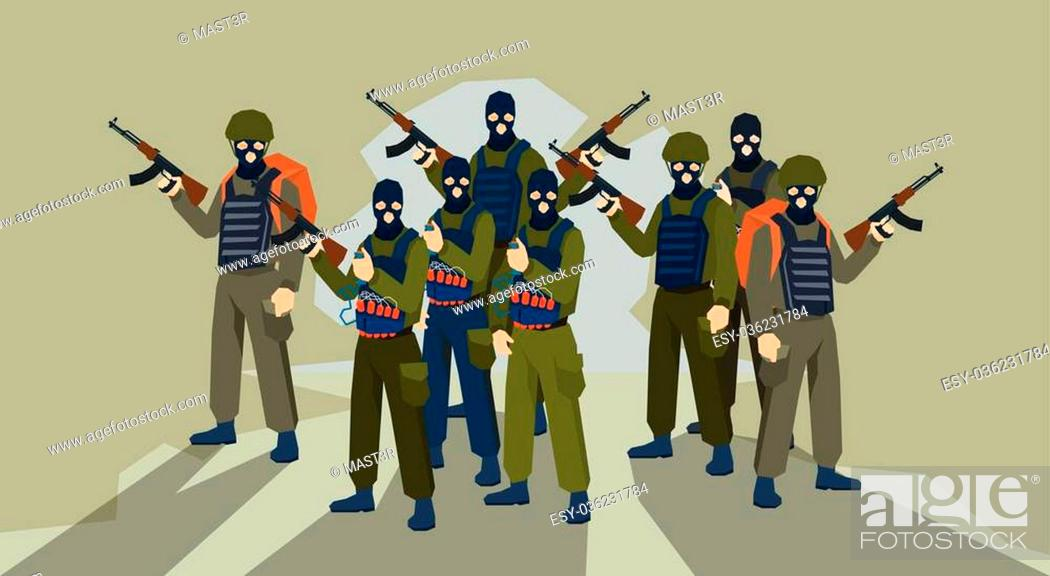

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

## **Data Inspection**

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
file_path ='/content/drive/MyDrive/Dataset/'
pd.set_option('display.max_columns', None)
global_terrorism_df = pd.read_csv(file_path + 'Global Terrorism Data.csv',encoding='cp1252')

In [4]:
global_terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
global_terrorism_df.shape

(181691, 135)

In [6]:
global_terrorism_df.duplicated().sum()

0

In [7]:
global_terrorism_df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
global_terrorism_df['summary'].isnull().sum()

66129

In [9]:
global_terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
terrorism_df = global_terrorism_df[['iyear','imonth', 'iday','country_txt','region_txt',
                                   'provstate','city','latitude', 'longitude','attacktype1_txt',
                                   'targtype1_txt','weaptype1_txt','gname','target1','nkill','nwound','summary','motive']]

In [11]:
terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                                            'provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                                            'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                                            'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},
                                   inplace=True)

In [12]:
terrorism_df.head()

,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Target_type,Weapon_type,Group,Target,Killed,Wounded,Summary,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,MANO-D,Julio Guzman,1.0,0.0,NaN,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,"Nadine Chaval, daughter",0.0,0.0,NaN,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,Employee,1.0,0.0,NaN,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,U.S. Embassy,NaN,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,U.S. Consulate,NaN,NaN,NaN,NaN


In [13]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Target_type  181691 non-null  object 
 11  Weapon_type  181691 non-null  object 
 12  Group        181691 non-null  object 
 13  Target       181055 non-null  object 
 14  Killed       171378 non-null  float64
 15  Wounded      165380 non-null  float64
 16  Summary      115562 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [14]:
terrorism_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              434
latitude         4556
longitude        4557
AttackType          0
Target_type         0
Weapon_type         0
Group               0
Target            636
Killed          10313
Wounded         16311
Summary         66129
Motive         131130
dtype: int64

## **Year with the most attacks**

In [15]:
attack_count_year = terrorism_df['Year'].value_counts().reset_index().rename(columns={'index':'Year','Year':'No.of_attack'})

In [16]:
attack_count_year

,Year,No.of_attack
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900
5,2012,8522
6,2011,5076
7,1992,5071
8,2010,4826
9,2008,4805


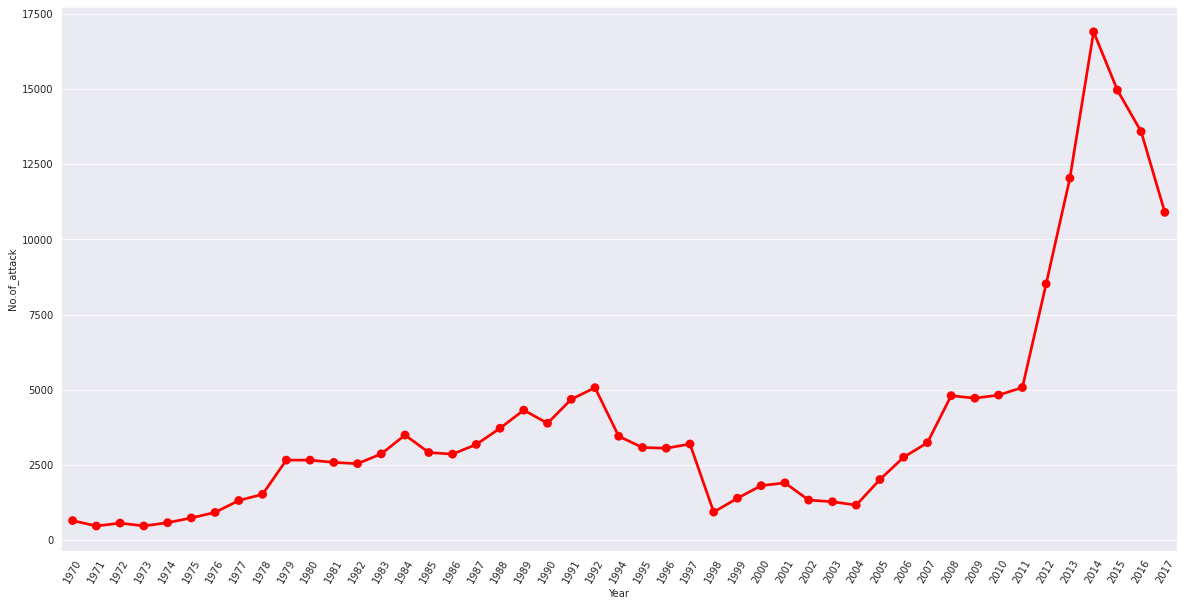

In [17]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
sns.pointplot(x=attack_count_year['Year'], y=attack_count_year['No.of_attack'],color='r')

## **Country,Region,state	 with the most attacks**

In [67]:
attack_count1 = terrorism_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'No.of_attack'})[:10]
attack_count2 = terrorism_df['Region'].value_counts().reset_index().rename(columns={'index':'Region','Region':'No.of_attack'})
attack_count3 = terrorism_df['state'].value_counts().reset_index().rename(columns={'index':'State','state':'No.of_attack'})[:10]
attack_count4 = terrorism_df['city'].value_counts().reset_index().rename(columns={'index':'City','city':'No.of_attack'})[:10]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

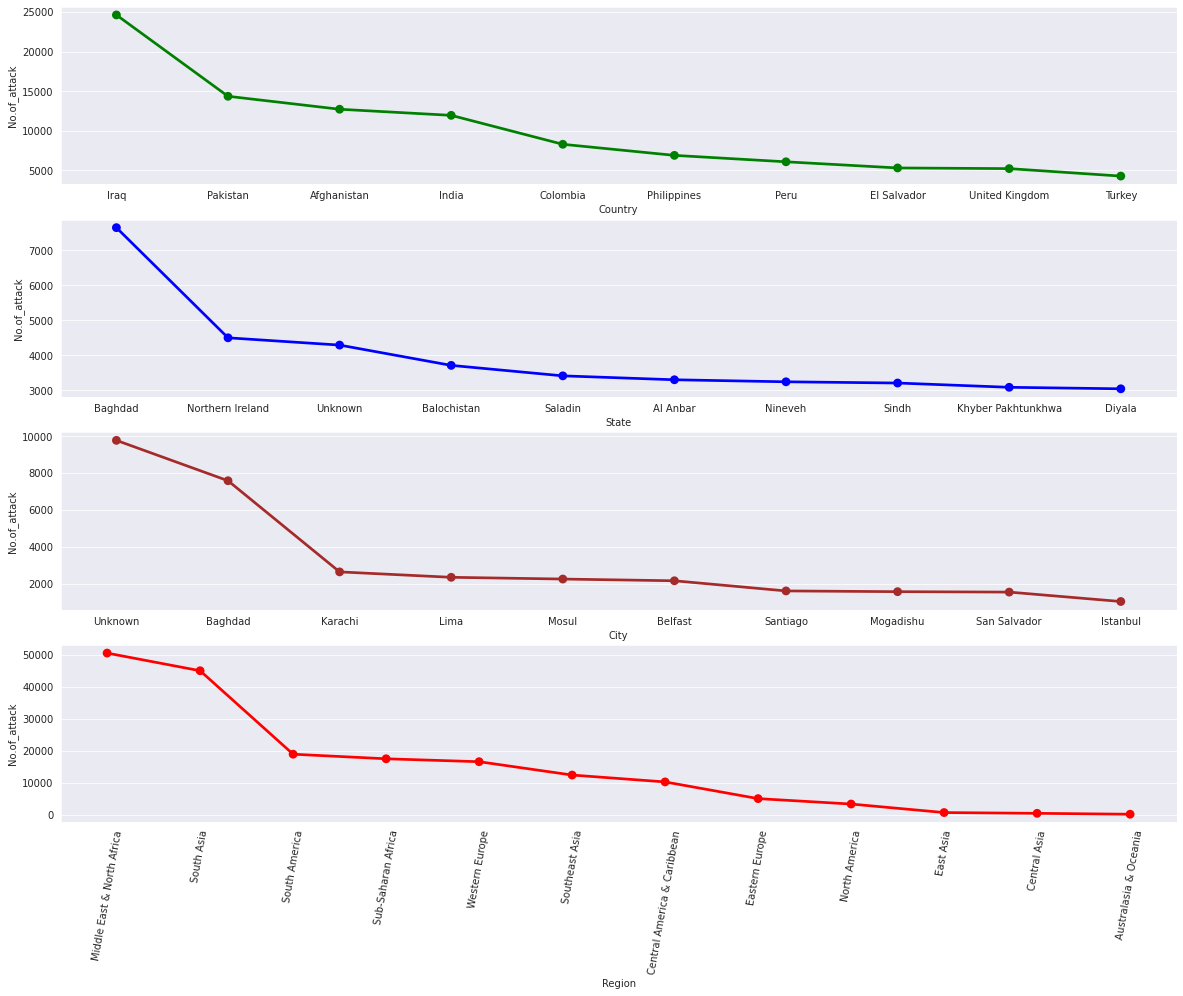

In [68]:
figure, axes = plt.subplots(nrows=4,figsize=(20,15))
sns.pointplot(x=attack_count1['Country'], y=attack_count1['No.of_attack'],color='g',ax=axes[0])
sns.pointplot(x=attack_count3['State'], y=attack_count3['No.of_attack'],color='b',ax=axes[1])
sns.pointplot(x=attack_count4['City'], y=attack_count4['No.of_attack'],color='brown',ax=axes[2])
sns.pointplot(x=attack_count2['Region'], y=attack_count2['No.of_attack'],color='r',ax=axes[3])
plt.xticks(rotation=80)

**Iraq, Pakistan, Afghanistan and India have suffered the most number of terror attacks**

## **Terrorist Activities by Region in each Year through Area Plot**

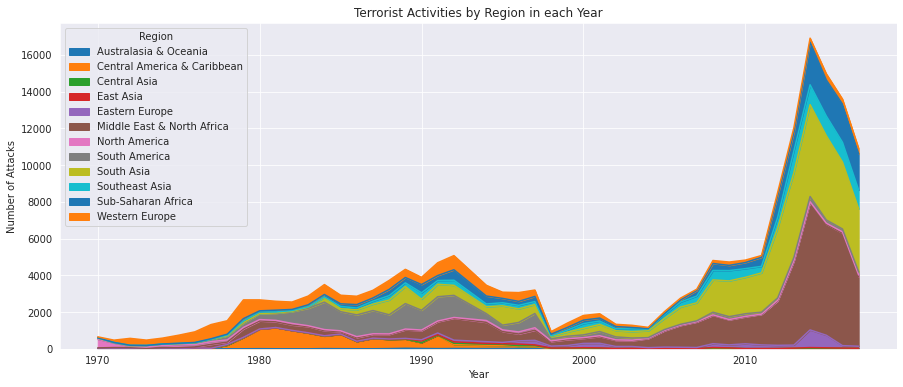

In [26]:
pd.crosstab(terrorism_df.Year, terrorism_df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

## **Most Attack Types**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

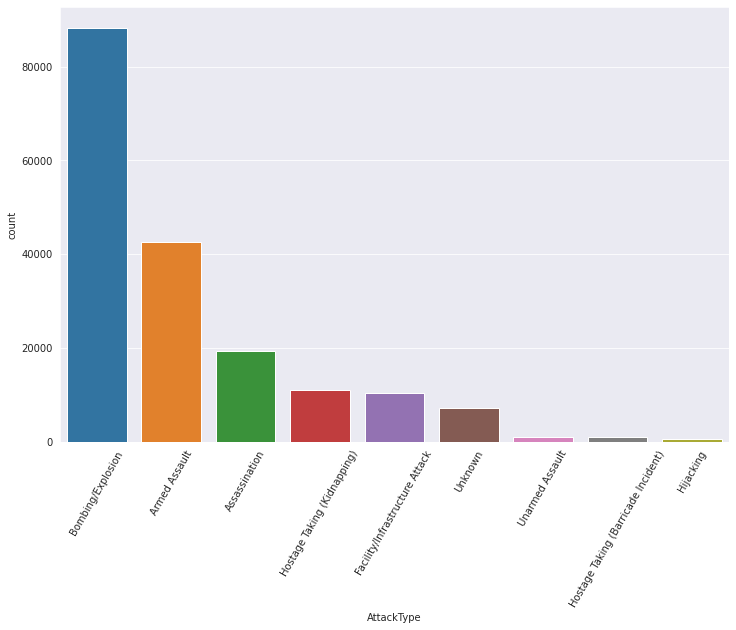

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(terrorism_df['AttackType'], order=terrorism_df['AttackType'].value_counts().index)
plt.xticks(rotation=60)

## **Most Weapon type**

In [28]:
terrorism_df['Weapon_type'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [29]:
#terrorism_df[terrorism_df['Weapon_type'] == 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

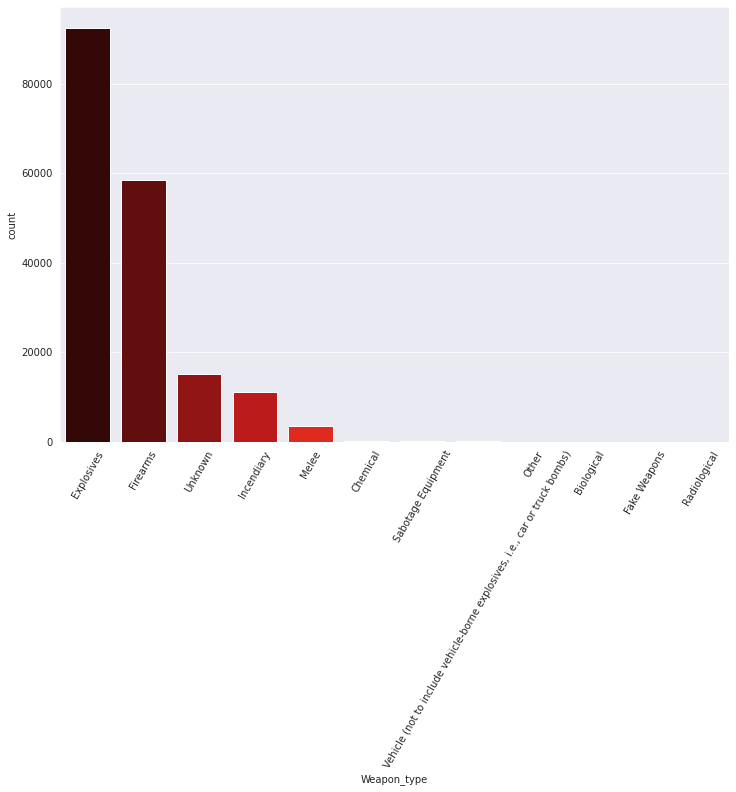

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(terrorism_df['Weapon_type'],order=terrorism_df['Weapon_type'].value_counts().index,palette='hot')
plt.xticks(rotation=60)

## **Group with the most attacks**

In [31]:
most_attacks = terrorism_df['Group'].value_counts().reset_index().rename(columns={'index':'Group','Group':'No.of_attack'})[1:11]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

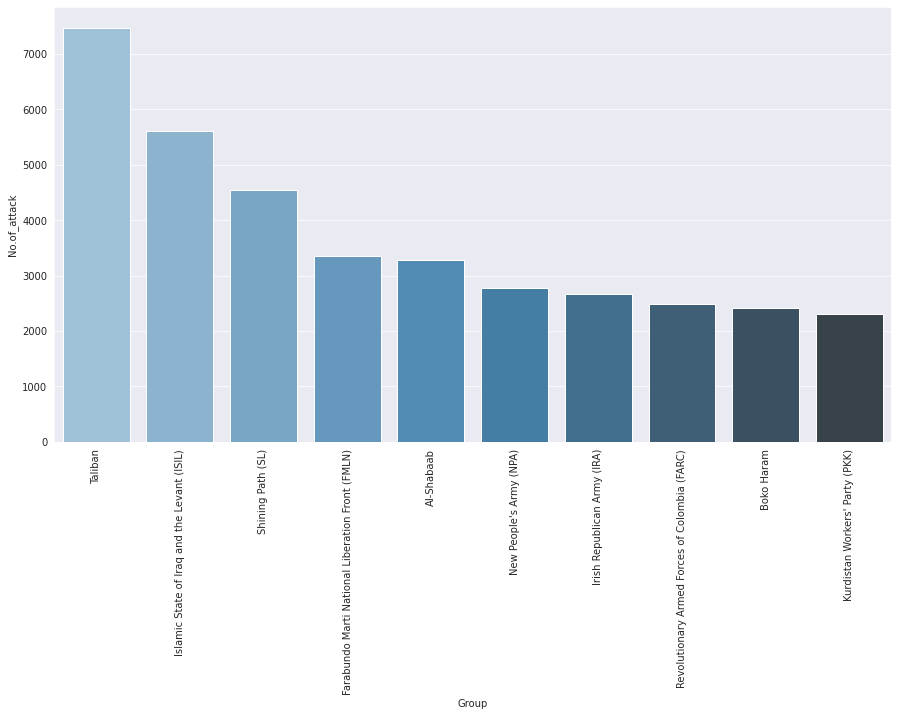

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x=most_attacks['Group'], y=most_attacks['No.of_attack'],palette='Blues_d')
plt.xticks(rotation=90)

## **Target type with the most attacks**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

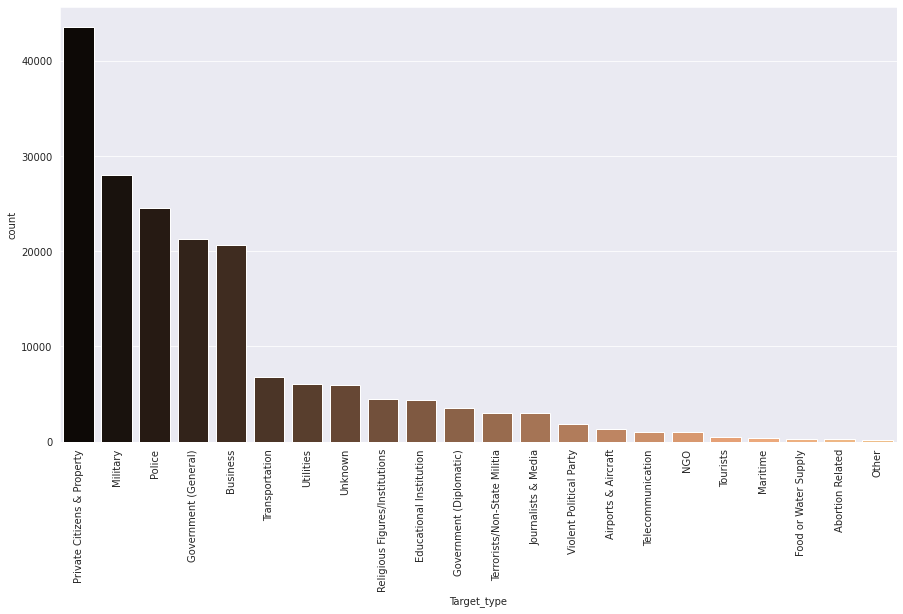

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(terrorism_df['Target_type'],order=terrorism_df['Target_type'].value_counts().index,palette='copper')
plt.xticks(rotation=90)

## **Killed and wounded in attacks**

In [34]:
killed = terrorism_df.groupby('Year')['Killed'].sum().reset_index()
wounded = terrorism_df.groupby('Year')['Wounded'].sum().reset_index()

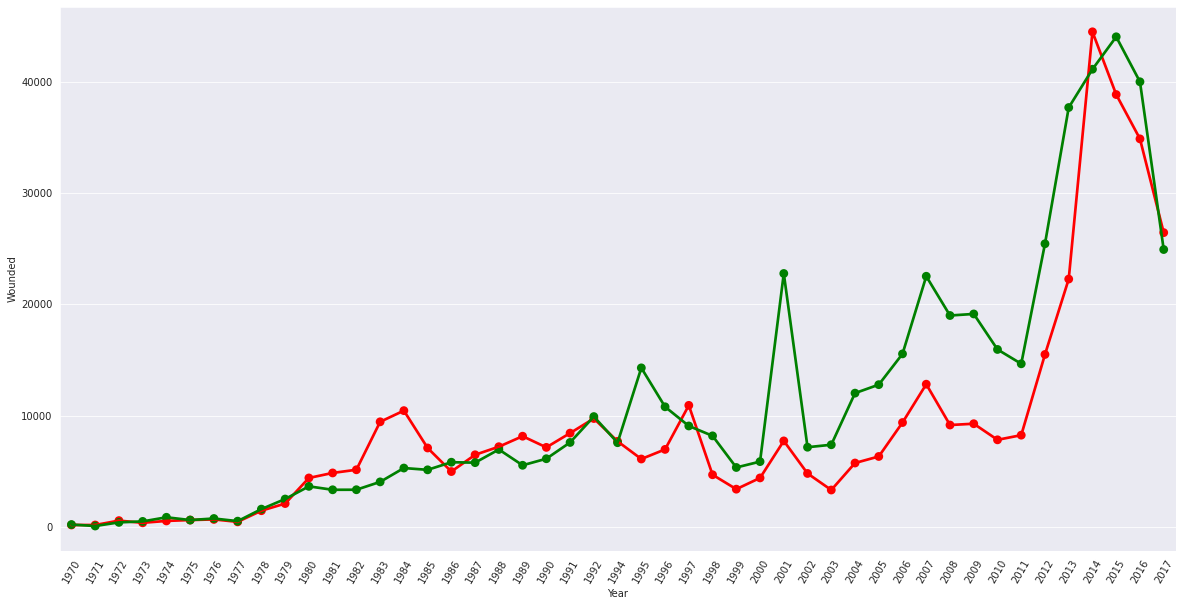

In [35]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
sns.pointplot(x=killed['Year'], y=killed['Killed'],color='r')
sns.pointplot(x=wounded['Year'],y=wounded['Wounded'],color='g')

In [36]:
casualties_df = killed.merge(wounded,on='Year')

In [37]:
casualties_df['casualities'] = casualties_df['Killed'] + casualties_df['Wounded']

In [38]:
casualties_df.head()

,Year,Killed,Wounded,casualities
0,1970,174.0,212.0,386.0
1,1971,173.0,82.0,255.0
2,1972,566.0,409.0,975.0
3,1973,370.0,495.0,865.0
4,1974,539.0,865.0,1404.0


## **Iraq, Pakistan, Afghanistan and India have suffered the most number of terror attacks**

### **Iraq**

In [39]:
iraq_df = terrorism_df.loc[terrorism_df['Country']=='Iraq',['Year','Group','city','Killed','Wounded']]
iraq_df['casualities'] = iraq_df['Killed'] + iraq_df['Wounded']

In [64]:
iraq_casuality = iraq_df.groupby('city')['casualities'].sum().reset_index().sort_values(by='casualities',ascending=False)[:15]
iraq_year = iraq_df['Year'].value_counts().reset_index().rename(columns={'index':'Year','Year':'No.of_attacks'})
iraq_group = iraq_df['Group'].value_counts().reset_index().rename(columns={'index':'Group','Group':'No.of_attacks'})[:15] 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

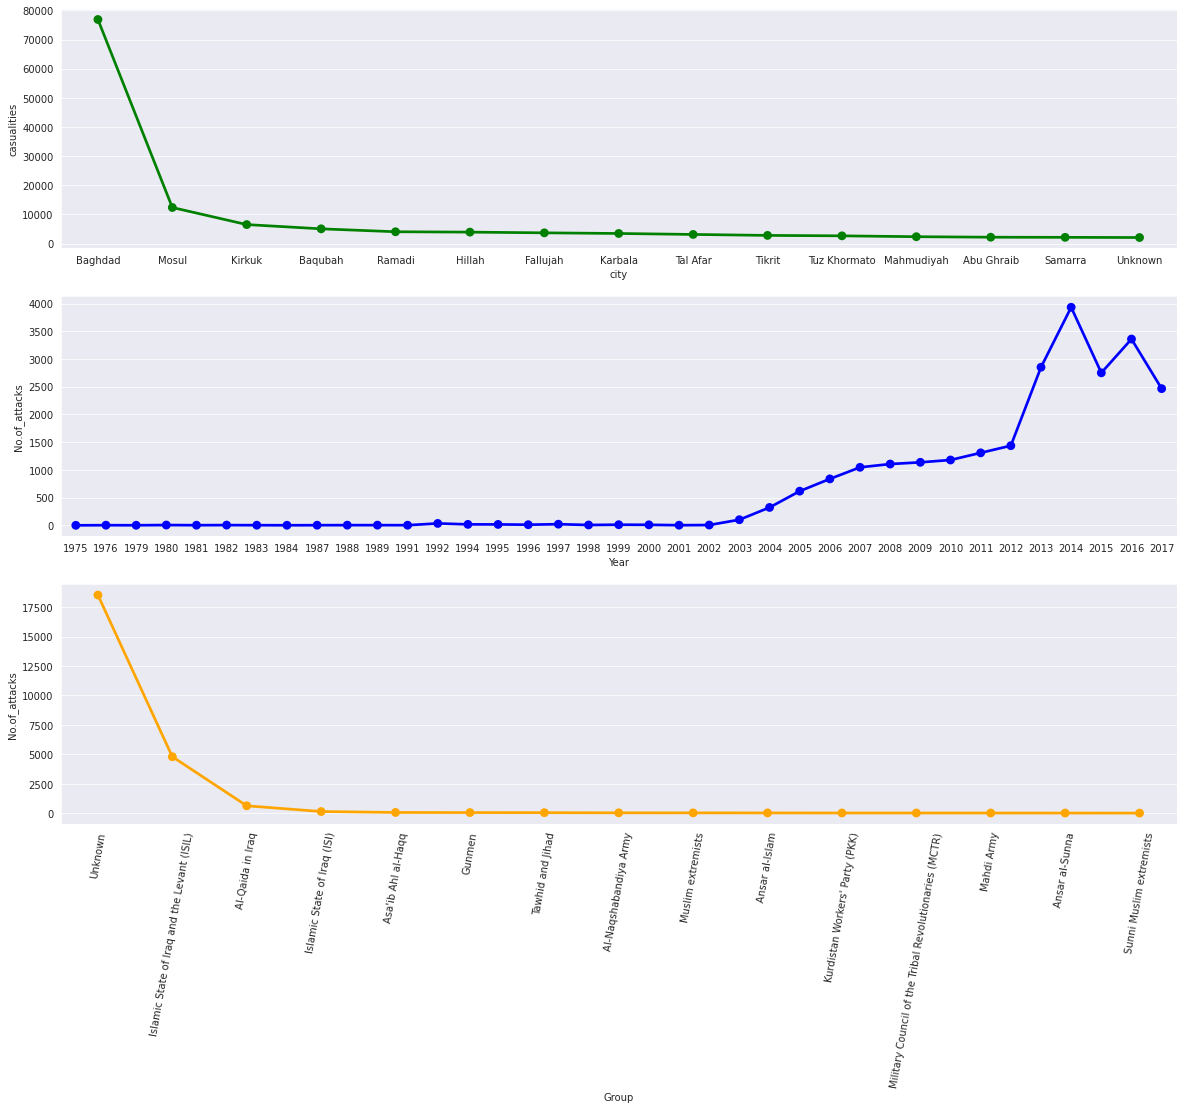

In [65]:
figure, axes = plt.subplots(nrows=3,figsize=(20,15))
sns.pointplot(x=iraq_casuality['city'], y=iraq_casuality['casualities'],color='g',ax=axes[0])
sns.pointplot(x=iraq_year['Year'], y=iraq_year['No.of_attacks'],color='b',ax=axes[1])
sns.pointplot(x=iraq_group['Group'], y=iraq_group['No.of_attacks'],color='orange',ax=axes[2])
plt.xticks(rotation=80)

### **Pakistan**

In [60]:
pak_df = terrorism_df.loc[terrorism_df['Country']=='Pakistan',['Year','Group','city','Killed','Wounded']]
pak_df['casualities'] = pak_df['Killed'] + pak_df['Wounded']

In [61]:
pak_casuality = pak_df.groupby('city')['casualities'].sum().reset_index().sort_values(by='casualities',ascending=False)[:15]
pak_year = pak_df['Year'].value_counts().reset_index().rename(columns={'index':'Year','Year':'No.of_attacks'})
pak_group = pak_df['Group'].value_counts().reset_index().rename(columns={'index':'Group','Group':'No.of_attacks'})[:15] 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

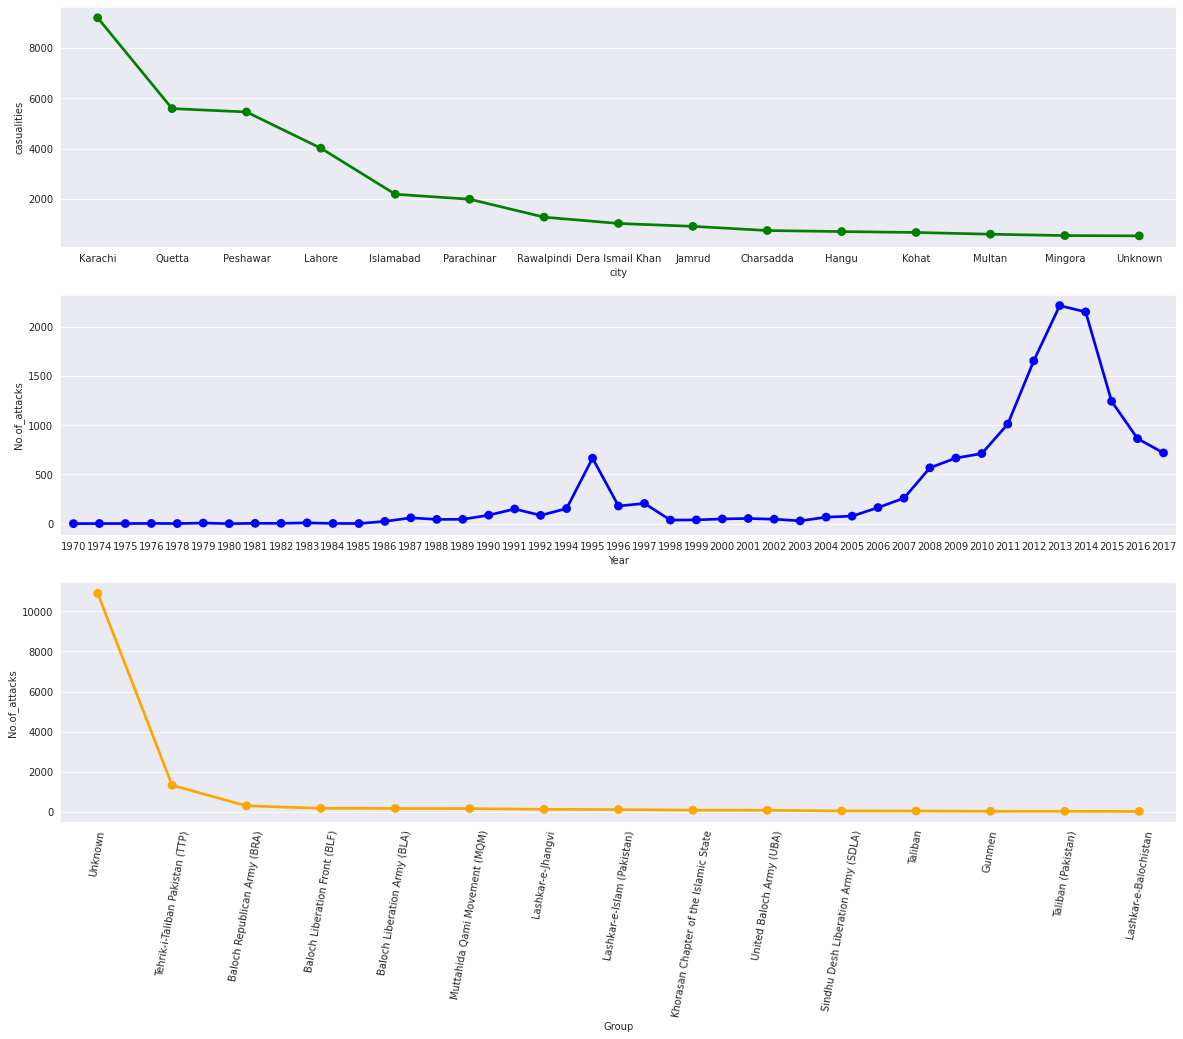

In [62]:
figure, axes = plt.subplots(nrows=3,figsize=(20,15))
sns.pointplot(x=pak_casuality['city'], y=pak_casuality['casualities'],color='g',ax=axes[0])
sns.pointplot(x=pak_year['Year'], y=pak_year['No.of_attacks'],color='b',ax=axes[1])
sns.pointplot(x=pak_group['Group'], y=pak_group['No.of_attacks'],color='orange',ax=axes[2])
plt.xticks(rotation=80)

### **Afghanistan**

In [41]:
afghanistan_df = terrorism_df.loc[terrorism_df['Country']=='Afghanistan',['Year','Group','city','Killed','Wounded']]
afghanistan_df['casualities'] = afghanistan_df['Killed'] + afghanistan_df['Wounded']

In [56]:
afg_casuality = afghanistan_df.groupby('city')['casualities'].sum().reset_index().sort_values(by='casualities',ascending=False)[:15]
afg_year = afghanistan_df['Year'].value_counts().reset_index().rename(columns={'index':'Year','Year':'No.of_attacks'})
afg_group = afghanistan_df['Group'].value_counts().reset_index().rename(columns={'index':'Group','Group':'No.of_attacks'})[:15] 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

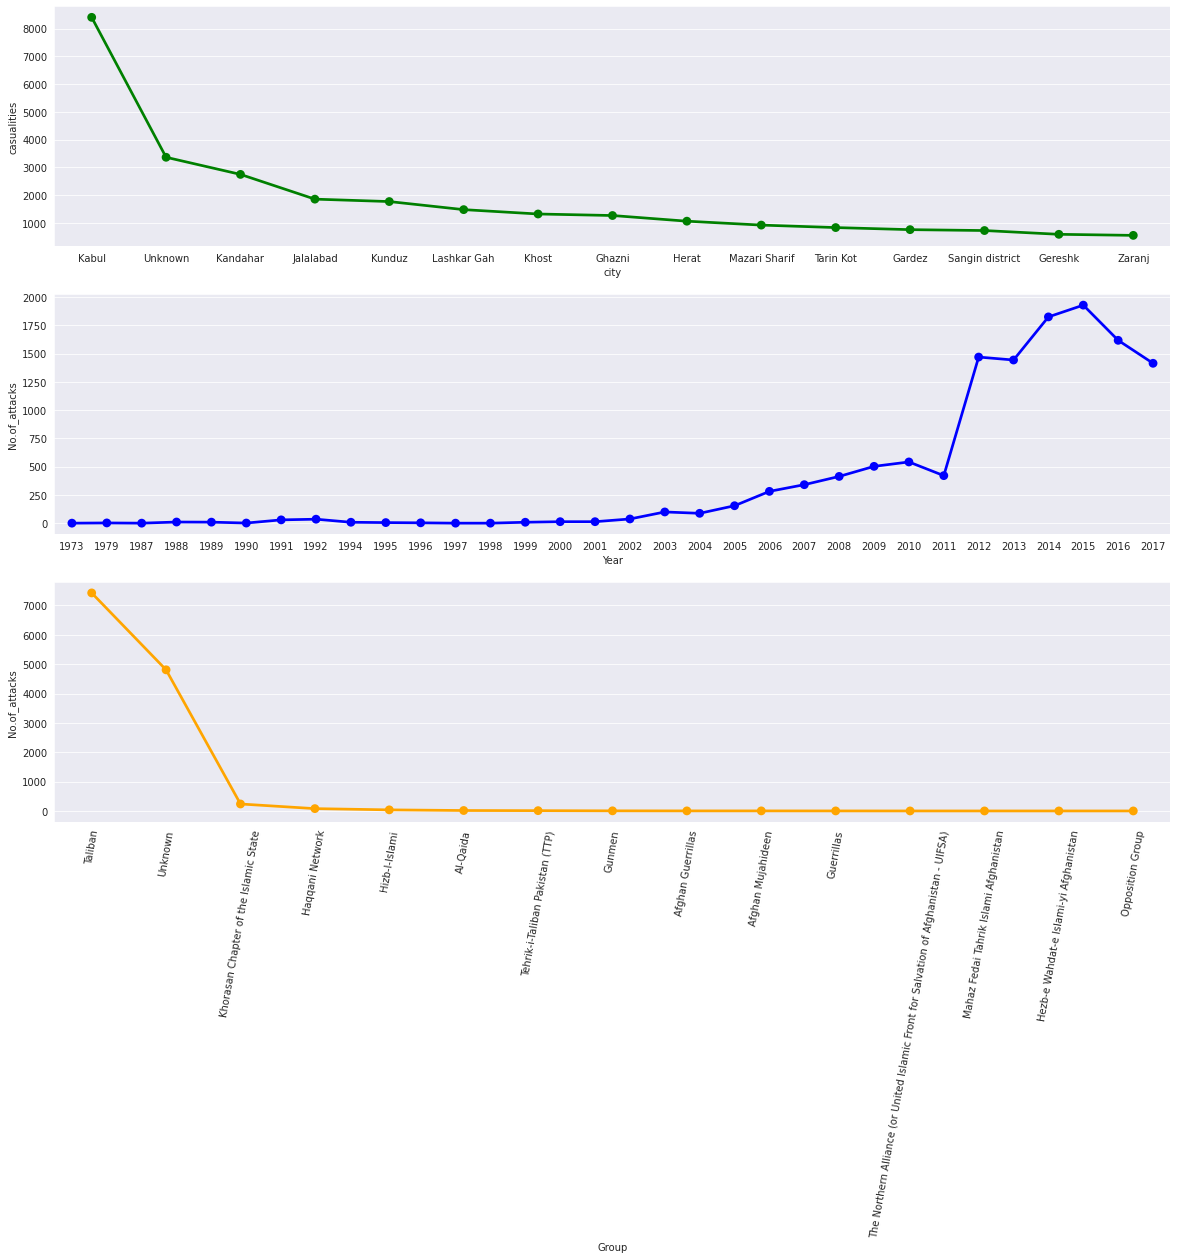

In [57]:
figure, axes = plt.subplots(nrows=3,figsize=(20,15))
sns.pointplot(x=afg_casuality['city'], y=afg_casuality['casualities'],color='g',ax=axes[0])
sns.pointplot(x=afg_year['Year'], y=afg_year['No.of_attacks'],color='b',ax=axes[1])
sns.pointplot(x=afg_group['Group'], y=afg_group['No.of_attacks'],color='orange',ax=axes[2])
plt.xticks(rotation=80)

### **India**

In [42]:
india_df = terrorism_df.loc[terrorism_df['Country']=='India',['Year','Group','city','Killed','Wounded']]
india_df['casualities'] = india_df['Killed'] + india_df['Wounded']

In [54]:
ind_casuality = india_df.groupby('city')['casualities'].sum().reset_index().sort_values(by='casualities',ascending=False)[:15]
ind_year = india_df['Year'].value_counts().reset_index().rename(columns={'index':'Year','Year':'No.of_attacks'})
ind_group = india_df['Group'].value_counts().reset_index().rename(columns={'index':'Group','Group':'No.of_attacks'})[1:15] 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

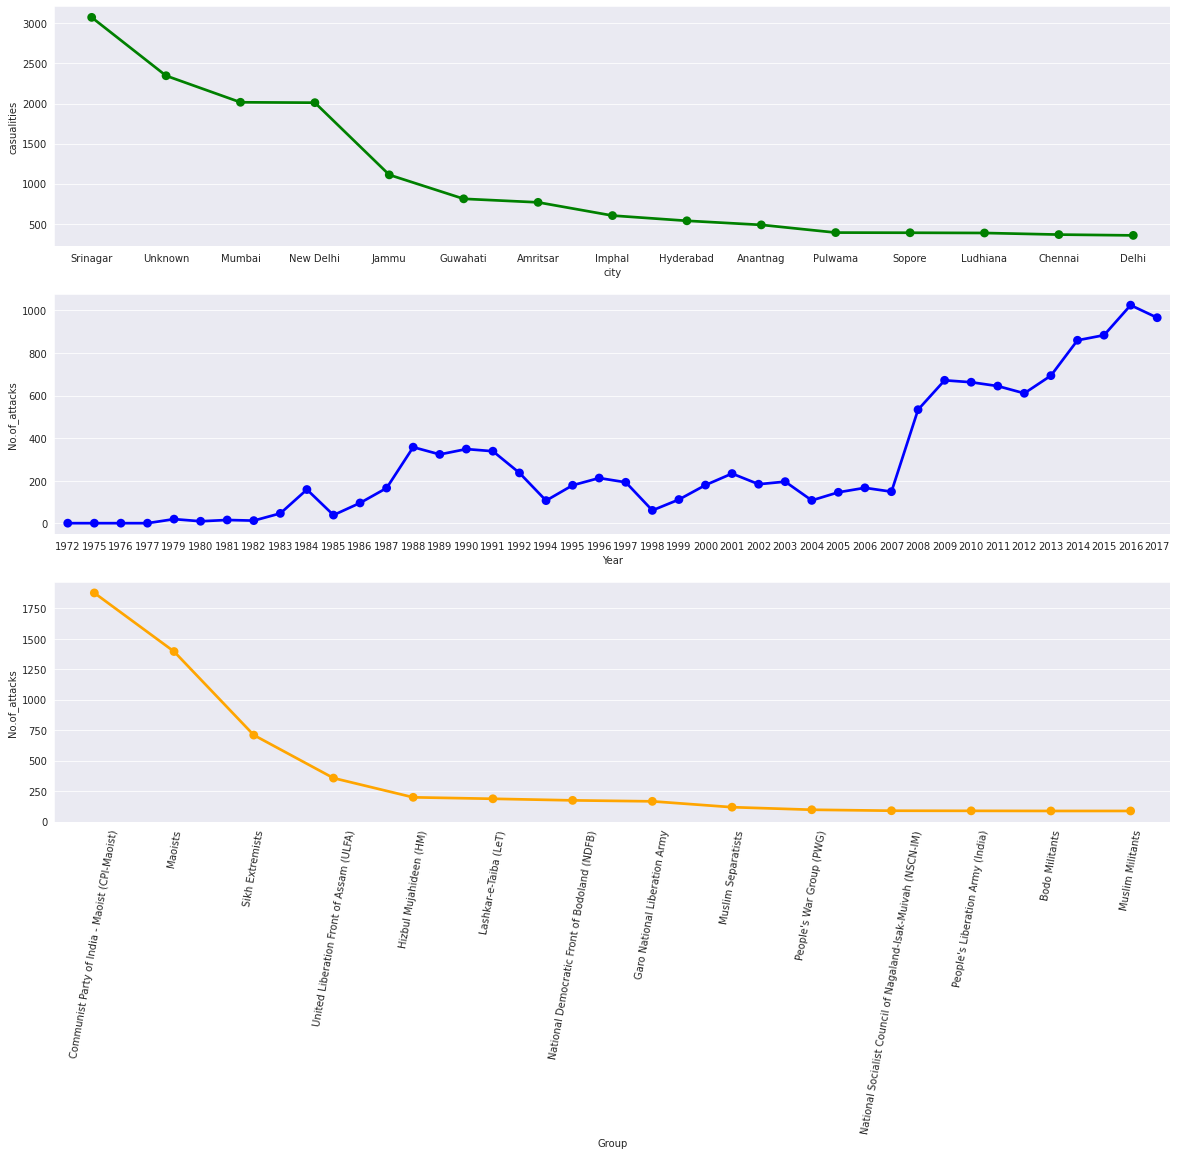

In [55]:
figure, axes = plt.subplots(nrows=3,figsize=(20,15))
sns.pointplot(x=ind_casuality['city'], y=ind_casuality['casualities'],color='g',ax=axes[0])
sns.pointplot(x=ind_year['Year'], y=ind_year['No.of_attacks'],color='b',ax=axes[1])
sns.pointplot(x=ind_group['Group'], y=ind_group['No.of_attacks'],color='orange',ax=axes[2])
plt.xticks(rotation=80)

## **Conclusion**



*   Iraq has the most attacks.
*   The Middle East and North Africa Regions has most taregeted.
*   Maximum number of attacks are from Bombing/Explosions.
*   There are maximum number of attacks in Private citizens and Property.
*   Taliban and ISIL has a most active organisation.
*   Iraq, Pakistan, Afghanistan and India have suffered the most number of terror attacks.

